<a href="https://colab.research.google.com/github/yashfirkedata/neu-det-surface-defect-detection/blob/main/NEU_DET_surface_defect_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NEU-DET Steel Surface Defect Detection**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = "/content/drive/MyDrive/NEUDataset/train"
test_dir = "/content/drive/MyDrive/NEUDataset/test"
valid_dir = "/content/drive/MyDrive/NEUDataset/valid"

#**Data Preprocessing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1667 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


####Checking for batch size

In [ ]:
for image_batch , labels_batch in train_generator :
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 200, 200, 3)
(32, 6)


In [ ]:
class_names = train_generator.class_indices
class_names = list(class_names.keys())
print(class_names)

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


###Defining functions for sampling images

In [ ]:
import matplotlib.pyplot as plt
#making functions
def get_sample_image(generator):
    images, labels = next(generator)
    image = images[0]
    label_index = np.argmax(labels[0])
    label_name = class_names[label_index]

    return image, label_name


def sample_images(generator, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

    for i in range(nrows*ncols):
        image, label_name = get_sample_image(generator)
        row = i // ncols
        col = i % ncols
        ax = axes[row][col]
        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis('off')

    plt.show()


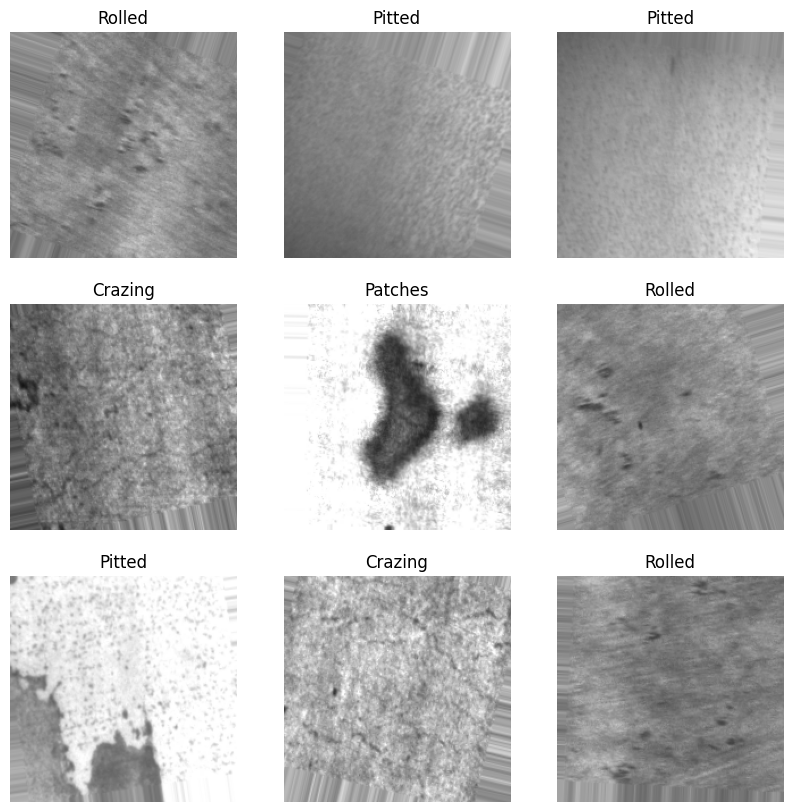

In [ ]:
sample_images(train_generator, nrows=3, ncols=3)

#**Model 1**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

model1 = Sequential([ Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(6 ,activation='softmax')])


model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0

In [ ]:
history1 = model1.fit(train_generator,
                    epochs=20,
                    batch_size=32,
                    validation_data=valid_generator)

Epoch 1/20
53/53 [==============================] - 528s 10s/step - loss: 1.7121 - accuracy: 0.3041 - val_loss: 0.9725 - val_accuracy: 0.4306
Epoch 2/20
53/53 [==============================] - 21s 390ms/step - loss: 0.8499 - accuracy: 0.6827 - val_loss: 0.8800 - val_accuracy: 0.5972
Epoch 3/20
53/53 [==============================] - 22s 416ms/step - loss: 0.5459 - accuracy: 0.8086 - val_loss: 0.7023 - val_accuracy: 0.7222
Epoch 4/20
53/53 [==============================] - 21s 400ms/step - loss: 0.5027 - accuracy: 0.8134 - val_loss: 0.5336 - val_accuracy: 0.8750
Epoch 5/20
53/53 [==============================] - 22s 411ms/step - loss: 0.4238 - accuracy: 0.8440 - val_loss: 0.5265 - val_accuracy: 0.8472
Epoch 6/20
53/53 [==============================] - 22s 413ms/step - loss: 0.3658 - accuracy: 0.8632 - val_loss: 0.9313 - val_accuracy: 0.7083
Epoch 7/20
53/53 [==============================] - 22s 406ms/step - loss: 0.3453 - accuracy: 0.8716 - val_loss: 0.3176 - val_accuracy: 0.8750


#**Model2**

In [ ]:
model2 = Sequential([ Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(6 ,activation='softmax')])

model2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model2.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 128)      

In [ ]:
history2 = model2.fit(train_generator,
                    epochs=20,
                    batch_size=32,
                    validation_data=valid_generator)

Epoch 1/20
53/53 [==============================] - 23s 400ms/step - loss: 1.8546 - accuracy: 0.3053 - val_loss: 1.2403 - val_accuracy: 0.4861
Epoch 2/20
53/53 [==============================] - 20s 384ms/step - loss: 0.8785 - accuracy: 0.6719 - val_loss: 0.5360 - val_accuracy: 0.8194
Epoch 3/20
53/53 [==============================] - 21s 403ms/step - loss: 0.6454 - accuracy: 0.7648 - val_loss: 1.9898 - val_accuracy: 0.3750
Epoch 4/20
53/53 [==============================] - 21s 401ms/step - loss: 0.6062 - accuracy: 0.7786 - val_loss: 0.2963 - val_accuracy: 0.8889
Epoch 5/20
53/53 [==============================] - 21s 388ms/step - loss: 0.3765 - accuracy: 0.8656 - val_loss: 0.2663 - val_accuracy: 0.8611
Epoch 6/20
53/53 [==============================] - 22s 406ms/step - loss: 0.3418 - accuracy: 0.8758 - val_loss: 0.3549 - val_accuracy: 0.8889
Epoch 7/20
53/53 [==============================] - 22s 422ms/step - loss: 0.3886 - accuracy: 0.8590 - val_loss: 0.5525 - val_accuracy: 0.7917

#**MobileNetV2 Model**

In [ ]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf

In [ ]:
num_classes = 6

# MobileNetV2 base
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(200, 200, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the convolutional base
base_model.trainable = False

# Model
model_mobilenet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Use 'sigmoid' for multi-label classification
])


# Compile the model with a learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = LearningRateScheduler(lambda epoch, lr: lr * tf.math.exp(-0.1))
opt = optimizers.Adam(learning_rate=initial_learning_rate)
model_mobilenet.compile(
    optimizer=opt,
    loss='categorical_crossentropy',  # 'binary_crossentropy' for multi-label classification
    metrics=['accuracy']
)

model_mobilenet.summary()

# Unfreeze more layers for fine-tuning
base_model.trainable = True
fine_tune_at = 50
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Adjust the learning rate for fine-tuning
opt_fine_tune = optimizers.Adam(learning_rate=0.0001)
model_mobilenet.compile(
    optimizer=opt_fine_tune,
    loss='categorical_crossentropy',  # 'binary_crossentropy' for multi-label classification
    metrics=['accuracy']
)

history_mobilenet = model_mobilenet.fit(train_generator,
                    epochs=30,
                    batch_size=32,
                    validation_data=valid_generator)

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 256)               327936    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 6)                 1542      
                                                         

#**EfficientNetB1 Model**

In [ ]:
num_classes = 6

# EfficientNetB1 base
base_model_efficient = tf.keras.applications.efficientnet.EfficientNetB1(include_top = False , weights = 'imagenet' ,
                                                               input_shape = (200,200,3))

# Freeze the convolutional base
base_model_efficient.trainable = False

# Model
model_efficient = models.Sequential([
    base_model_efficient,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Use 'sigmoid' for multi-label classification
])


# Compile the model with a learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = LearningRateScheduler(lambda epoch, lr: lr * tf.math.exp(-0.1))
opt = optimizers.Adam(learning_rate=initial_learning_rate)
model_efficient.compile(
    optimizer=opt,
    loss='categorical_crossentropy',  # 'binary_crossentropy' for multi-label classification
    metrics=['accuracy']
)

model_efficient.summary()

# Unfreeze more layers for fine-tuning
base_model_efficient.trainable = True
fine_tune_at = 50
for layer in base_model_efficient.layers[:fine_tune_at]:
    layer.trainable = False

# Adjust the learning rate for fine-tuning
opt_fine_tune = optimizers.Adam(learning_rate=0.0001)
model_efficient.compile(
    optimizer=opt_fine_tune,
    loss='categorical_crossentropy',  # 'binary_crossentropy' for multi-label classification
    metrics=['accuracy']
)

history_efficient = model_efficient.fit(train_generator,
                    epochs=30,
                    batch_size=16,
                    validation_data=valid_generator)

27018416/27018416 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional  (None, 7, 7, 1280)        6575239   
 )                                                               
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 256)               327936    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 6)                 1542      
                                                       

#Plotting Accuracy and Loss Curves, Printing Evaluation

In [ ]:
def plot_history(history,metric):
    plt.plot(history.history[metric])
    plt.plot(history.history["val_"+metric],"")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, "val_"+metric])
    plt.show()

####**Model1**

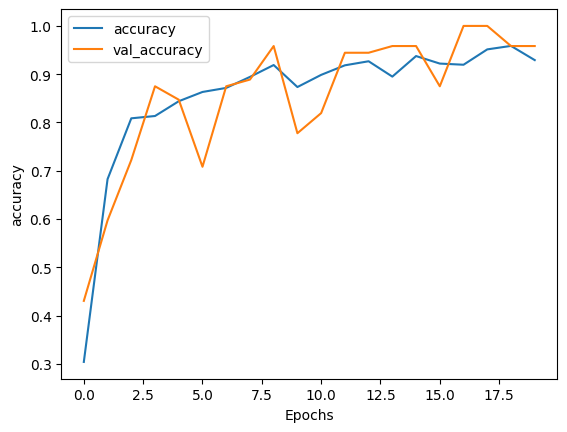

In [ ]:
plot_history(history1,"accuracy")

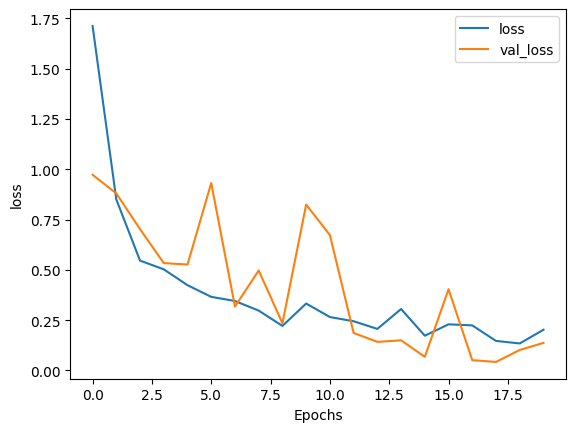

In [ ]:
plot_history(history1,"loss")

In [ ]:
result1 = model1.evaluate(test_generator)
print("Test loss, Test accuracy : ", result1)

3/3 [==============================] - 0s 71ms/step - loss: 0.3064 - accuracy: 0.8611
Test loss, Test accuracy :  [0.3064206540584564, 0.8611111044883728]


####**Model2**

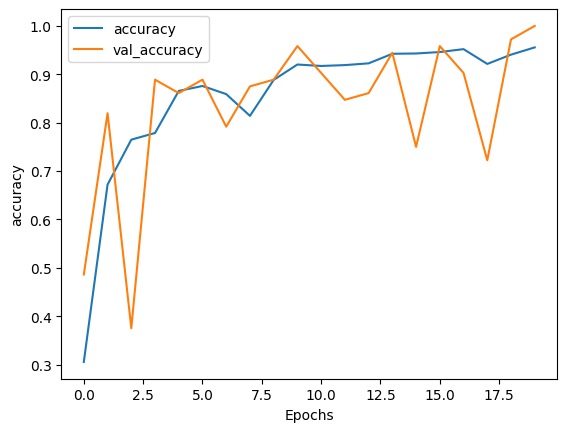

In [ ]:
plot_history(history2,"accuracy")

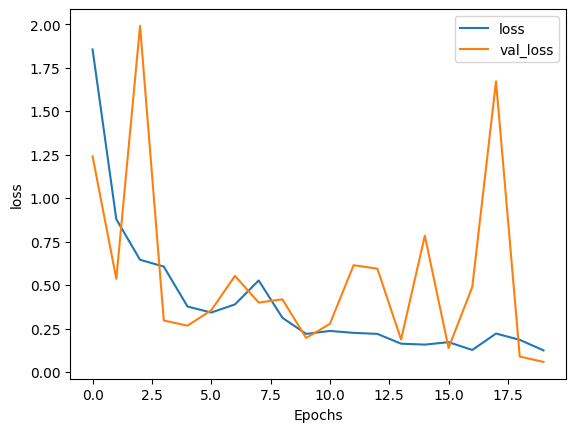

In [ ]:
plot_history(history2,"loss")

In [ ]:
result2 = model2.evaluate(test_generator)
print("Test loss, Test accuracy : ", result2)

3/3 [==============================] - 1s 133ms/step - loss: 0.3472 - accuracy: 0.8750
Test loss, Test accuracy :  [0.3471944034099579, 0.875]


####**MobileNetV2 Model**

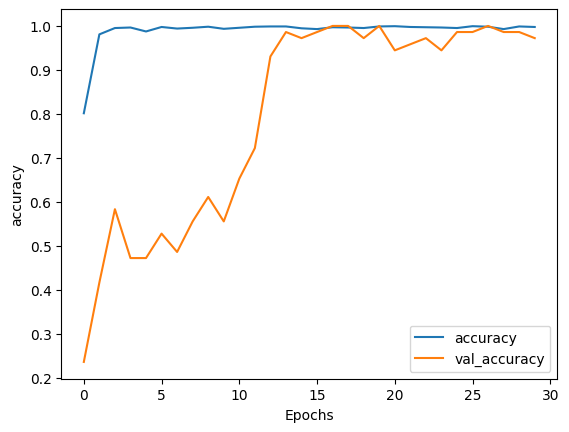

In [ ]:
plot_history(history_mobilenet,"accuracy")

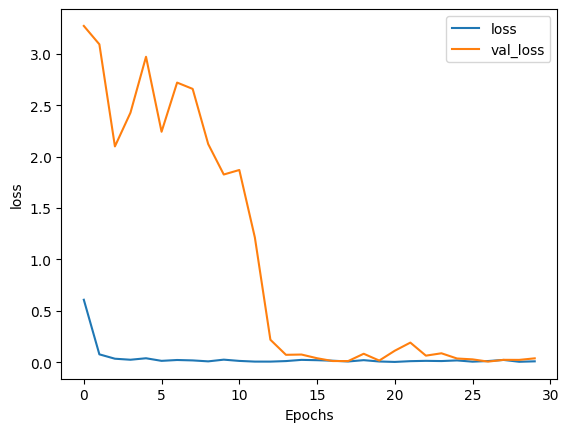

In [ ]:
plot_history(history_mobilenet,"loss")

In [ ]:
result_mobilenet = model_mobilenet.evaluate(test_generator)
print("Test loss, Test accuracy : ", result_mobilenet)

3/3 [==============================] - 0s 109ms/step - loss: 0.0761 - accuracy: 0.9861
Test loss, Test accuracy :  [0.0761433020234108, 0.9861111044883728]


####**EfficientNetB1 Model**

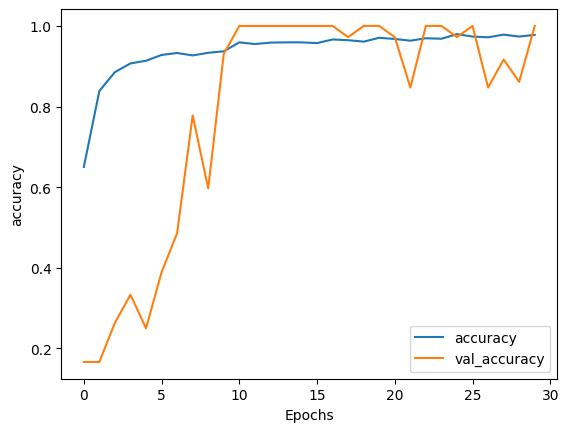

In [ ]:
plot_history(history_efficient,"accuracy")

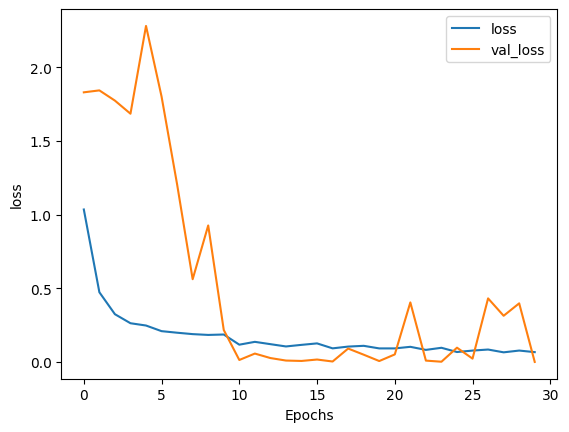

In [ ]:
plot_history(history_efficient,"loss")

In [ ]:
result_efficient = model_efficient.evaluate(test_generator)
print("Test loss, Test accuracy : ", result_efficient)

3/3 [==============================] - 1s 227ms/step - loss: 5.5828e-04 - accuracy: 1.0000
Test loss, Test accuracy :  [0.0005582821322605014, 1.0]


#**Comparing Between Models**


In [ ]:
# Define the accuracy and loss values for both models
model1_accuracy = history1.history['accuracy'][-1]
model1_loss = history1.history['loss'][-1]
model2_accuracy = history2.history['accuracy'][-1]
model2_loss = history2.history['loss'][-1]
model_mobilenet_accuracy = history_mobilenet.history['accuracy'][-1]
model_mobilenet_loss = history_mobilenet.history['loss'][-1]
model_efficient_accuracy = history_efficient.history['accuracy'][-1]
model_efficient_loss = history_efficient.history['loss'][-1]


# Create a dictionary with the accuracy and loss values
data = {'Model': ['Model 1', 'Model 2','MobileNetV2', 'EfficientNetB1'],
        'Accuracy': [model1_accuracy, model2_accuracy, model_mobilenet_accuracy, model_efficient_accuracy],
        'Loss': [model1_loss, model2_loss, model_mobilenet_loss, model_efficient_loss]}

df = pd.DataFrame(data)
df

,Model,Accuracy,Loss
0,Model 1,0.929214,0.202334
1,Model 2,0.955609,0.124339
2,MobileNetV2,0.997600,0.007912
3,EfficientNetB1,0.977804,0.066639


####**We can observe that out MobileNetV2 Model gives highest accuracy with minumum loss so we will use our MobileNetV2 model for predictions.**

#Visualize Predicted Images

1/1 [==============================] - 2s 2s/step


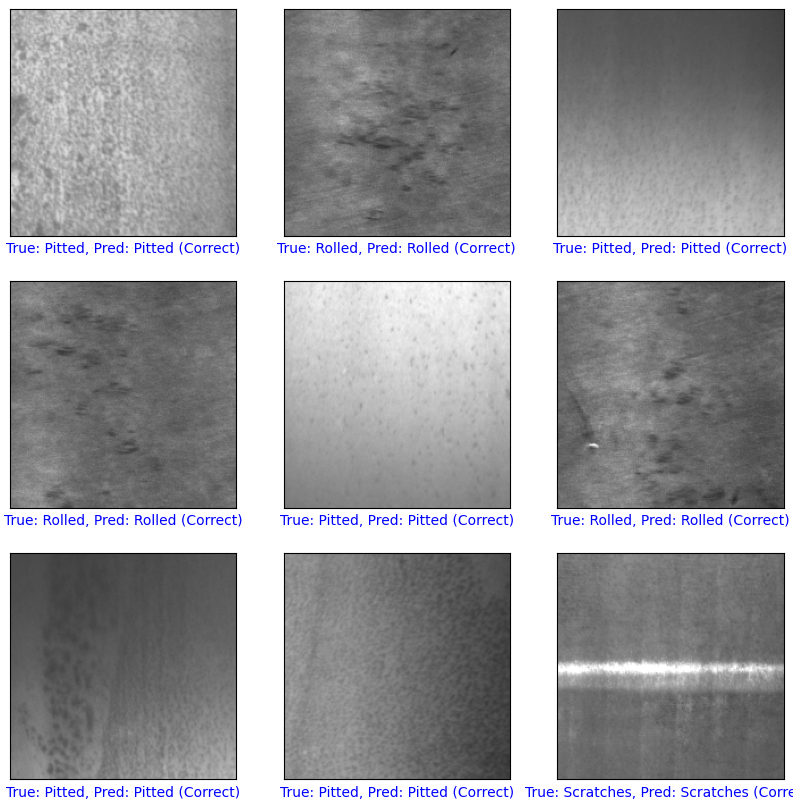

In [ ]:
images, labels = next(test_generator)

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = model_mobilenet.predict(images)


class_names=list(test_generator.class_indices.keys())


plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image = images[i]
    if image.shape[-1] == 1:
        image = np.squeeze(image)

    plt.imshow(image)

    predicted_label = np.argmax(predictions[i])

    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"

    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"

    plt.xlabel(label_text,color=color)

####**Hence, we have built a model based of the NEU Surface Defect Database using Transfer Learning (MobileNetV2) and achieved great results on classifying defects.**